Saving train.csv to train (3).csv
📝 Columns in dataset: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


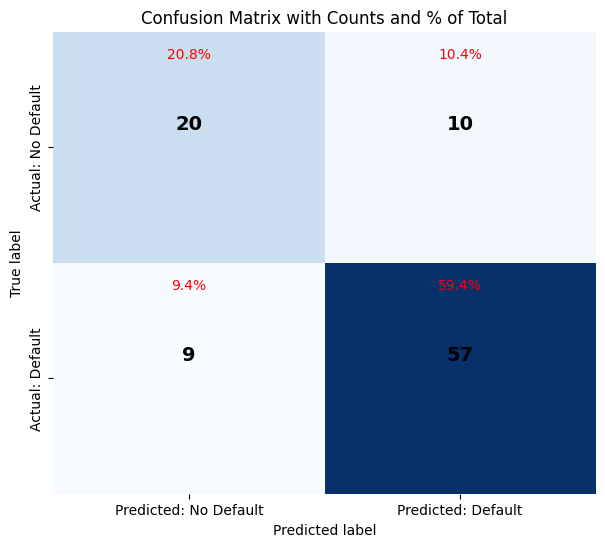


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.85      0.86      0.86        66

    accuracy                           0.80        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.80      0.80      0.80        96

✅ Accuracy: 0.8021
✅ Precision: 0.8507
✅ Recall: 0.8636


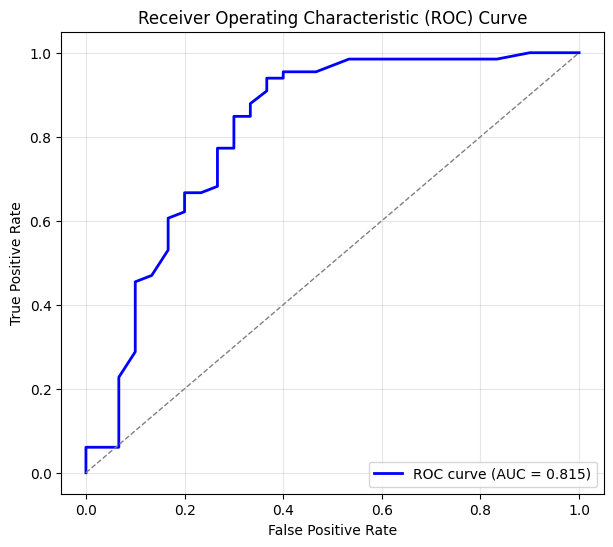

<ipython-input-20-1c018210b0f8>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')


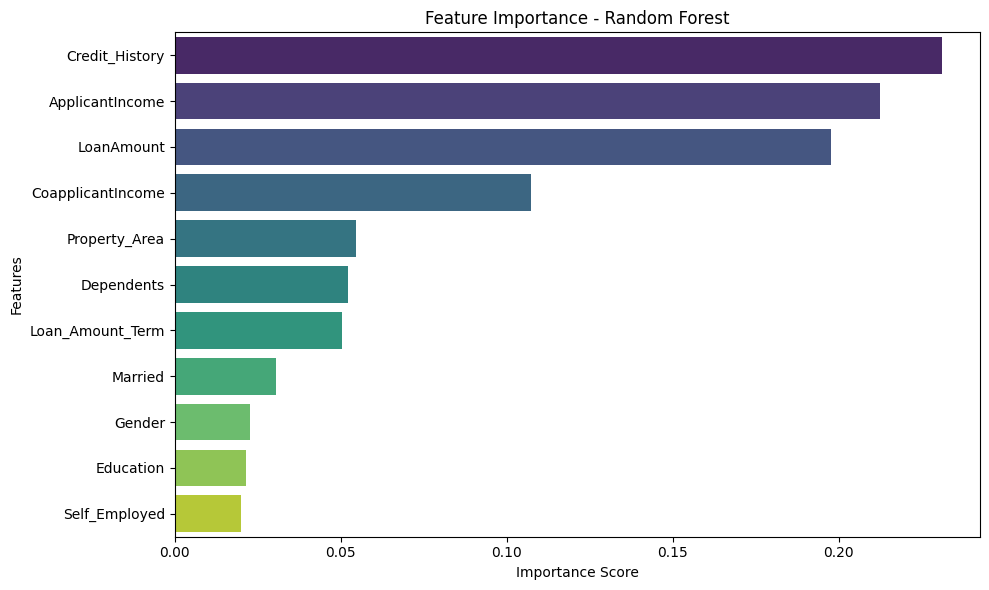

In [20]:
# File Upload
from google.colab import files
uploaded = files.upload()

# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, roc_curve, auc)

# Load uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display column names to identify the target column
print("📝 Columns in dataset:", df.columns.tolist())

# 🔧 Set your actual target column name here
target_column = 'Loan_Status'  # <-- Update if different

# Drop Loan_ID if exists
if 'Loan_ID' in df.columns:
    df = df.drop(columns=['Loan_ID'])

# Drop rows with missing values for simplicity
df = df.dropna()

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratify to keep class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC curve

# 1. Improved Confusion Matrix with counts and percentages on separate lines
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum * 100

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=False, cmap='Blues', cbar=False,
            xticklabels=['Predicted: No Default', 'Predicted: Default'],
            yticklabels=['Actual: No Default', 'Actual: Default'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        pct = cm_percent[i, j]
        plt.text(j + 0.5, i + 0.4, f'{count}',
                 ha='center', va='center', fontsize=14, color='black', fontweight='bold')
        plt.text(j + 0.5, i + 0.1, f'{pct:.1f}%',
                 ha='center', va='center', fontsize=10, color='red')

plt.title('Confusion Matrix with Counts and % of Total')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# 2. Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# 3. Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# 5. Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
